In [20]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('endangeredAmphibian.csv')
df.head()

,id,scientific_name,kingdom,phylum,class,order,family,genus,specific_epithet,taxonomic_status,threat_status,coordinates,display_name,town,state_district,country,temperature,humidity
0,2431315,Bolitoglossa capitana,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,capitana,Válido,CR,"[(4.53148, -74.336), (4.53148, -74.336), (4.53...","Granada, Sumapaz, RAP (Especial) Central, Colo...",Granada,Sumapaz,Colombia,13.892222,84.111111
1,9338198,Bolitoglossa guaneae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,guaneae,Válido,VU,"[(5.617806, -73.956917), (5.617694, -73.956806...","Llano Grande, Pauna, Occidente, Boyacá, RAP (E...",NaN,Occidente,Colombia,17.191471,95.705882
2,2431289,Bolitoglossa hiemalis,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hiemalis,Válido,VU,"[(4.063167, -76.499361), (4.063167, -76.499361...","Riofrío, Centro, Valle del Cauca, RAP Pacífico...",NaN,Centro,Colombia,6.780909,97.000000
3,2431296,Bolitoglossa hypacra,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,hypacra,Válido,EN,"[(6.453389, -76.099083), (6.453389, -76.099083...","Sendero a Campanas, Urrao, Suroeste, Antioquia...",Urrao,Suroeste,Colombia,5.942759,97.034483
4,9577531,Bolitoglossa leandrae,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Bolitoglossa,leandrae,Válido,CR,"[(4.86, -73.26), (4.86, -73.26), (4.15, -73.65)]","Marginal de la Selva, Santa María, Neira, Boya...",Santa María,Neira,Colombia,19.136667,95.000000


In [37]:
print(df.shape)

(288, 18)


In [38]:
df.isna().sum()

id                    0
scientific_name       0
kingdom               0
phylum                0
class                 0
order                 0
family                0
genus                 0
specific_epithet      0
taxonomic_status      0
threat_status         0
coordinates           0
display_name         91
town                196
state_district      125
country              91
temperature          91
humidity             91
dtype: int64

In [39]:
df.drop(columns=['town', 'state_district'], inplace=True)

In [40]:
df.dropna(inplace=True)

In [41]:
print(df.shape)

(197, 16)


In [42]:
df.isna().sum()

id                  0
scientific_name     0
kingdom             0
phylum              0
class               0
order               0
family              0
genus               0
specific_epithet    0
taxonomic_status    0
threat_status       0
coordinates         0
display_name        0
country             0
temperature         0
humidity            0
dtype: int64

In [43]:
df = df[['temperature', 'humidity']]
df.describe()

,temperature,humidity
count,197.000000,197.000000
mean,14.799470,95.289695
std,4.466713,4.053146
min,0.460000,81.714286
25%,11.928462,93.714286
50%,15.360400,96.739130
75%,17.585000,98.116279
max,24.785294,100.000000


In [44]:
scaler = StandardScaler()

In [45]:
df[['temperature_t', 'humidity_t']] = scaler.fit_transform(df[['temperature', 'humidity']])
df

,temperature,humidity,temperature_t,humidity_t
0,13.892222,84.111111,-0.203630,-2.765028
1,17.191471,95.705882,0.536881,0.102944
2,6.780909,97.000000,-1.799755,0.423045
3,5.942759,97.034483,-1.987877,0.431574
4,19.136667,95.000000,0.973478,-0.071656
...,...,...,...,...
277,14.944444,95.388889,0.032539,0.024536
278,11.672000,91.533333,-0.701956,-0.929138
281,16.190000,98.000000,0.312103,0.670395
285,15.820000,98.500000,0.229057,0.794071


In [46]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

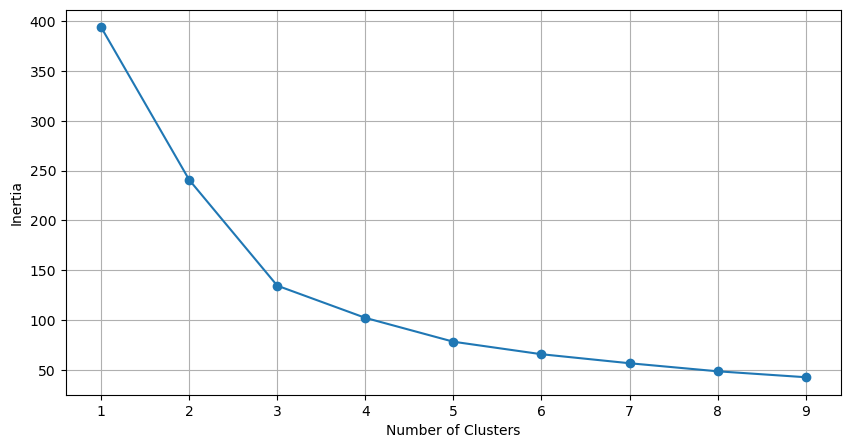

In [47]:
optimise_k_means(df[['temperature_t', 'humidity_t']], 10)

In [48]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['temperature_t', 'humidity_t']])

KMeans(n_clusters=4)

In [49]:
df['kmeans_4'] = kmeans.labels_

In [50]:
df

,temperature,humidity,temperature_t,humidity_t,kmeans_4
0,13.892222,84.111111,-0.203630,-2.765028,2
1,17.191471,95.705882,0.536881,0.102944,0
2,6.780909,97.000000,-1.799755,0.423045,1
3,5.942759,97.034483,-1.987877,0.431574,1
4,19.136667,95.000000,0.973478,-0.071656,0
...,...,...,...,...,...
277,14.944444,95.388889,0.032539,0.024536,3
278,11.672000,91.533333,-0.701956,-0.929138,1
281,16.190000,98.000000,0.312103,0.670395,3
285,15.820000,98.500000,0.229057,0.794071,3


# Plotting

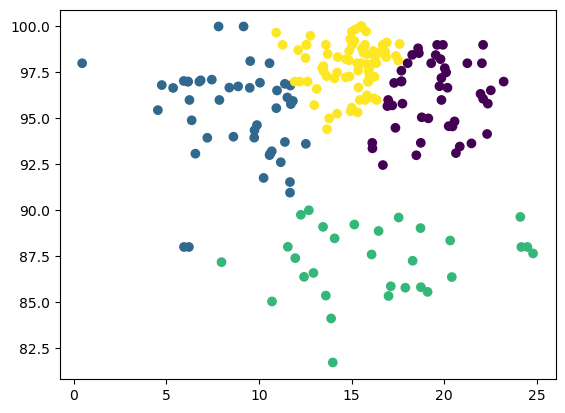

In [51]:
plt.scatter(x=df['temperature'], y=df['humidity'], c=df['kmeans_4'])
plt.show()

In [52]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['temperature_t', 'humidity_t']])
    df[f'KMeans_{k}'] = kmeans.labels_
df

,temperature,humidity,temperature_t,humidity_t,kmeans_4,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,13.892222,84.111111,-0.203630,-2.765028,2,0,1,2,1,3
1,17.191471,95.705882,0.536881,0.102944,0,0,0,1,0,0
2,6.780909,97.000000,-1.799755,0.423045,1,0,0,0,3,2
3,5.942759,97.034483,-1.987877,0.431574,1,0,0,0,3,2
4,19.136667,95.000000,0.973478,-0.071656,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
277,14.944444,95.388889,0.032539,0.024536,3,0,0,1,2,4
278,11.672000,91.533333,-0.701956,-0.929138,1,0,1,0,3,3
281,16.190000,98.000000,0.312103,0.670395,3,0,0,1,2,4
285,15.820000,98.500000,0.229057,0.794071,3,0,0,1,2,4


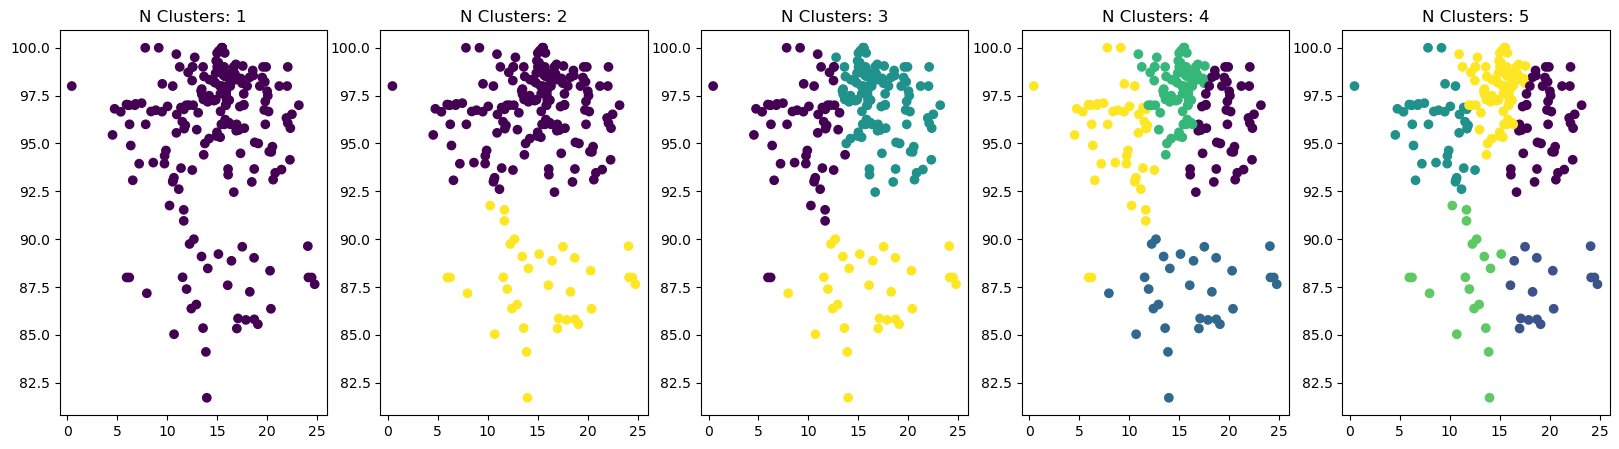

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['temperature'], y=df['humidity'], c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')